<center><img src="./Figs/cs-logo.png" width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>VIC : Introduction to Computer Vision </center>
<center>Lab 2 :Low-Level Vision: Pre-processing, image filtering and edge detection </center>
<hr style=" border:none; height:3px;">
</h1>


## PART 1 : Histograms and point-based transformations




The objective of this exercise is to revisit some simple image manipulations through the concept of histograms. You will work on an image of your choice.

+ Open an image and visualize it. We will initially work with the grayscale version of the image.


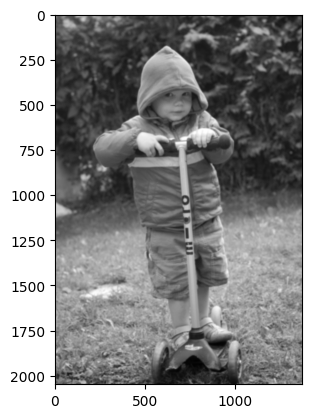

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt


def loadImagebis(src):
    img=cv2.imread(src,0)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    return img

    
img = loadImagebis('./Images/oscar.jpg')

+ Compute and visualise the histogram of the image 

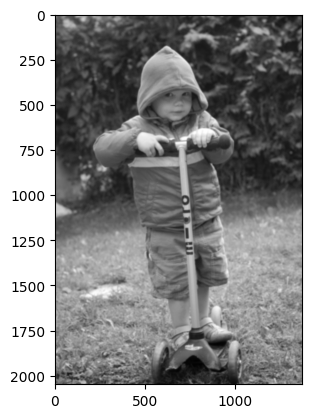

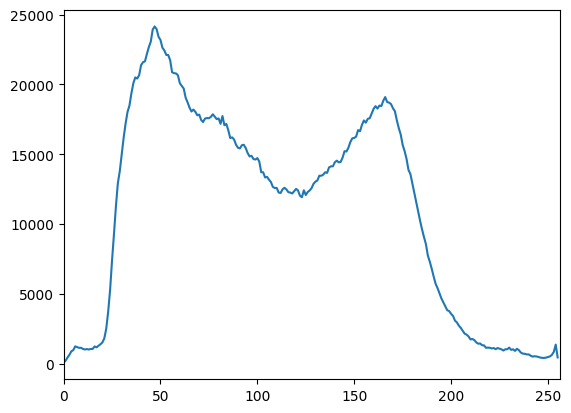

In [2]:
img = loadImagebis('./Images/oscar.jpg')

hist_img = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist_img)
plt.xlim([0,256])
plt.show()

+ Write a function to determine the minimum and maximum grayscale levels of an image and apply it to your image.


In [3]:
import numpy as np

def MinMaxGray(I):
    return np.amax(I),np.amin(I)
   
print(MinMaxGray(img)) 

(255, 0)


+ Write a function **equalizationHisto(I, h)** that, given an image $I$ and its histogram $h$, returns the image after histogram equalization. You should also display the histogram of the image after equalization.

In the first version, do not use the methods provided by the OpenCV library except for those that allow constructing a histogram, such as **calcHist**. You will need to compute the cumulative histogram and apply the transformation discussed in class.


**La réponse était [ici](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)**


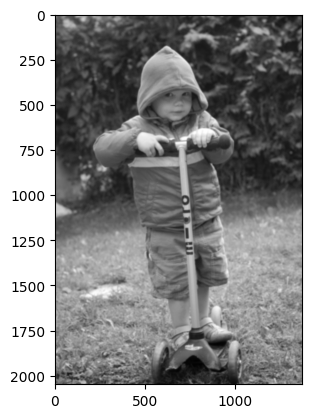

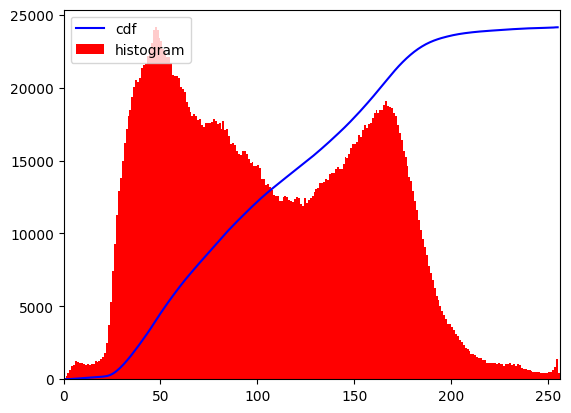

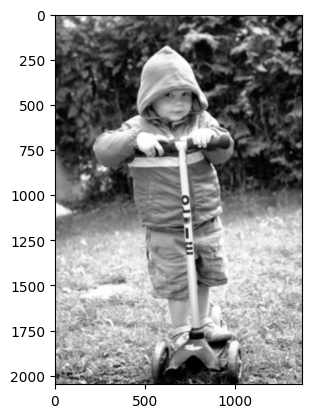

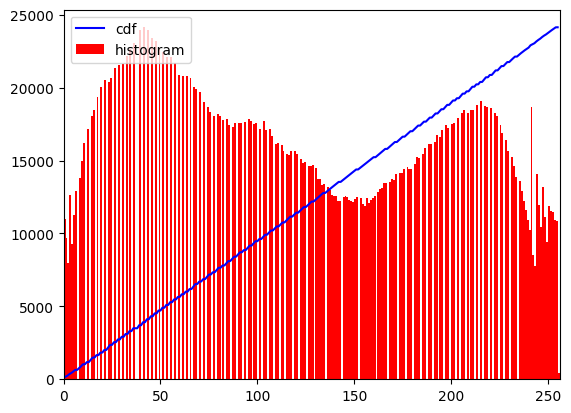

In [4]:
def computeCumulatedHisto(I):
    hist,bins = np.histogram(I.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized




def egalisationHisto(h,I):
    cdf_m = np.ma.masked_equal(h,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[I]
    return img2
    
# Chargement de l'image en niveaux de gris
img = loadImagebis('./Images/oscar.jpg')
# calcul de l'histogramme cumulé avec numpy
cum_hist = computeCumulatedHisto(img)
# Visualisation
plt.plot(cum_hist, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Application de l'egalisation
new_img = egalisationHisto(cum_hist,img)
plt.imshow(new_img ,cmap = 'gray', interpolation = 'bicubic')
plt.show()


hist,bins = np.histogram(new_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
# Visualisation
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

+ Write a second version **equalizationHistobis(h, I)** in which you can use the methods already available in OpenCV and NumPy as described [here](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html#:~:text=Histograms%20Equalization%20in%20OpenCV&text=Its%20input%20is%20just%20grayscale,is%20our%20histogram%20equalized%20image.&text=So%20now%20you%20can%20take,confined%20to%20a%20particular%20region.).


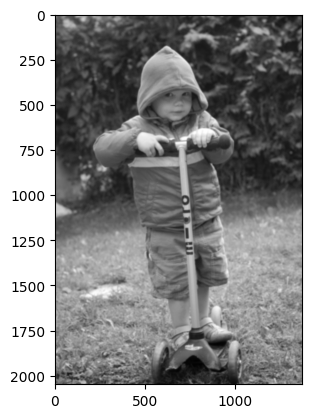

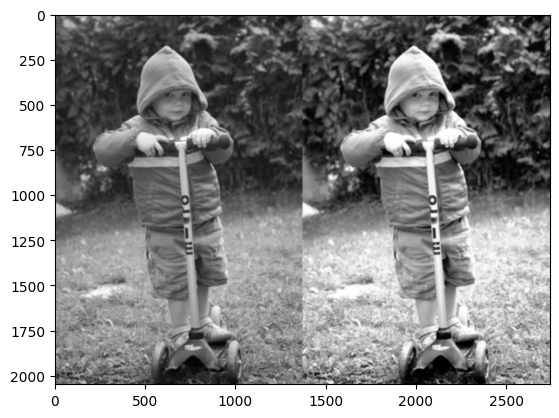

In [5]:
def egalisationHistobis(I):
    equ = cv2.equalizeHist(I)
    res = np.hstack((I,equ))
    return res

# Chargement de l'image en niveaux de gris
img = loadImagebis('./Images/oscar.jpg')
img_eq = egalisationHistobis(img)
plt.imshow(img_eq ,cmap = 'gray', interpolation = 'bicubic')
plt.show()


Now apply the principle of histogram equalization to a color image using two strategies:  
+ The first strategy involves applying the histogram equalization principle to each color component of your image individually.  
+ The second strategy involves converting the image to the HSV color space and applying histogram equalization only to the $V$ component.  

What do you observe?


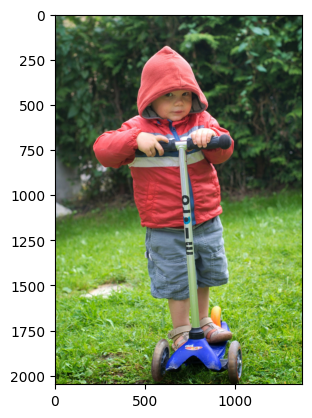

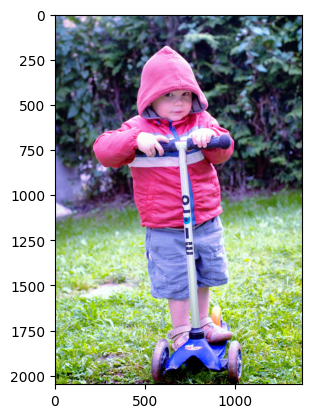

In [6]:
# Strategy 1 : each component
img = cv2.imread('./Images/oscar.jpg',1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Travail sur le canal B
cum_hist_B = computeCumulatedHisto(cv2.split(img)[0])
# Travail sur le canal G
cum_hist_G = computeCumulatedHisto(cv2.split(img)[1])
# Travail sur le canal R
cum_hist_R = computeCumulatedHisto(cv2.split(img)[2])

# Application de l'egalisation
new_img_B = egalisationHisto(cum_hist_B,cv2.split(img)[0])
new_img_G = egalisationHisto(cum_hist_G,cv2.split(img)[1])
new_img_R = egalisationHisto(cum_hist_R,cv2.split(img)[2])

img_eq_1 = cv2.merge((new_img_B,new_img_G,new_img_R))

plt.imshow(cv2.cvtColor(img_eq_1, cv2.COLOR_BGR2RGB))
plt.show()

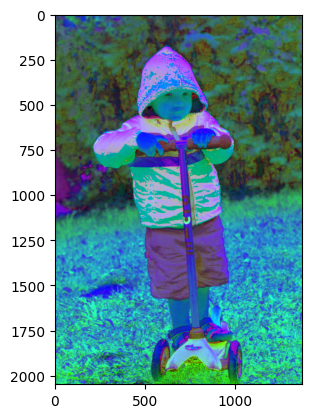

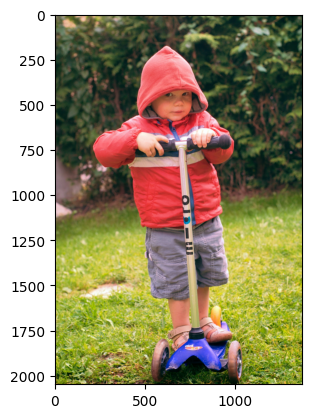

In [7]:
# Strategy 2

img = cv2.imread('./Images/oscar.jpg',1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()


# Travail sur le canal B
cum_hist_V = computeCumulatedHisto(cv2.split(img)[2])
# Application de l'egalisation
new_img_V = egalisationHisto(cum_hist_V,cv2.split(img)[2])

img_eq_2 = cv2.merge((cv2.split(img)[0],cv2.split(img)[1],new_img_V))

plt.imshow(cv2.cvtColor(img_eq_2, cv2.COLOR_BGR2RGB))
plt.show()

## Part 2 : Filtering

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the filter `f = [1,3,2]` and the 1D image `I = [0,1,2,3,3,3,1,3,6]`. What is the result of `f*I`? Implement your own convolution and then compare it to `scipy.ndimage.convolve1d`. Pad the image with zeros at the boundaries if necessary. Plot the two signals and observe their difference. What does this filter do?

In [ ]:
f = np.array([1, 3, 2])
I = np.array([0, 1, 2, 3, 3, 3, 1, 3, 6])

In [ ]:
# TODO: implement f * I here and print the output

In [ ]:
from scipy.ndimage import convolve1d

O_np = # TODO
print(O_np)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(O_np, color='orange')
ax.scatter(range(len(O_np)), O_np, marker='o', color='orange')
ax.plot(I, color='blue')
ax.scatter(range(len(I)), I, marker='o', color='blue')

### Exercise 2

Now let us pass to two dimensions. We read an image and the corresponding (human generated) ground truth of the image contours.

In [ ]:
from scipy import io

mat = io.loadmat('12003.mat')
bound = mat['groundTruth'][0, 2][0][0][1]

image = plt.imread('12003.jpg')

fig, axes = plt.subplots(figsize=(15, 10), ncols=2)

axes[0].imshow(image)
axes[1].imshow(bound, cmap='gray')

The exercises below will be simplified if we work on a grayscale representation. We also normalise to a [0, 1] range

In [ ]:
# conversion to grayscale
r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
img = (0.2989 * r + 0.5870 * g + 0.1140 * b) / 255.

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, cmap='gray')

### Exercise 3

Salt and pepper noise randomly sets each pixel to the minimum or maximum of the image range (here, 0 or 1). Implement a function with parameter $p$ to add salt and pepper noise to the grayscale `img`. Each pixel should become 0 with probability $p/2$, 1 with probability $p/2$, and stay unchanged with probability $1 - p$. Use the `random.random` to sample probabilities.

In [ ]:
from random import random

def salt_and_pepper_noise(img, p):
    """
    Adds salt and pepper noise to the image
    p: probability of the noise
    """

    I_out = img.copy()

    # TODO

    return I_out

We can plot the result. Try adjusting the amount of salt and pepper. For best results, proceed to the next exercise with $p \approx 0.1$

In [ ]:
sp_img = salt_and_pepper_noise(img, 0.1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(sp_img, cmap='gray')

## Low-pass filters

Low-pass filters attenuate high-frequency signals, and can be used for smoothing and noise removal. Here we will implement three such filters. Take some time to check the different results. Which filter behaves better and why?

### Exercise 4.1

Implement a mean filter,

$$
M = 1/9 \cdot \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$

as a `np.array` object to remove the salt and pepper noise from the image. Use the `scipy.ndimage.convolve` function to convolve the filter. Try changing the filter size. What happens?

In [ ]:
from scipy.ndimage import convolve

MEAN_FILTER = # TODO
mean_img = # TODO

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mean_img, cmap='gray')

### Exercise 4.2

Apply a Gaussian filter to the image. This time, use the `scipy.ndimage.gaussian_filter` function. Try adjusting the `sigma` parameter. What do you observe?

In [ ]:
from scipy.ndimage import gaussian_filter

gaussian_img = # TODO

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gaussian_img, cmap='gray')

### Exercise 4.3

Implement a median filter to denoise the image. Note that this filter is non-linear, so this time you will have to code the sliding-window process yourself. Can you think of an improvement to a simple sliding-window approach?

In [ ]:
def median_filter(img, radius):
    h, w = img.shape

    I_out = img.copy()
    
    # TODO
    
    return I_out

median_img = median_filter(sp_img, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(median_img, cmap='gray')

## High-pass filters

High-pass filters promote high-frequency information, and can be used for image sharpening and edge detection. Here we implement two such filters.

### Exercise 5.1

Implement the Laplacian filter,

$$\Delta I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2} := I * \Bigg(\begin{bmatrix}
0 & 0 & 0 \\
-1 & 2 & -1 \\
0 & 0 & 0
\end{bmatrix} + 
\begin{bmatrix}
0 & -1 & 0 \\
0 & 2 & 0 \\
0 & -1 & 0
\end{bmatrix}\Bigg)$$

on the original image to detect the edges. Once more, you should use `scipy.ndimage.convolve` to perform the convolution. Perform the same using the smoothed images from a Gaussian filter. What do you observe?

In [ ]:
LAPLACE_FILTER = # TODO

laplace_img = #TODO

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(laplace_img, cmap='gray')

### Exercise 5.2

Implement the Sobel filters and apply them to `img` to detect the edges,

$$G_x = I * \begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{bmatrix}, G_y = I * \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}.$$

In [ ]:
sobel_x_img = # TODO
sobel_y_img = # TODO

fig, axes = plt.subplots(figsize=(15, 10), ncols=2)
axes[0].imshow(sobel_x_img, cmap='gray')
axes[0].set_title('$G_x$')
axes[1].imshow(sobel_y_img, cmap='gray')
axes[1].set_title('$G_y$')

### Exercise 5.3

Combine the Sobel gradient images to obtain the gradient magnitude image,

$$G = \sqrt{G_x^2 + G_y^2}$$

Then, binarise this by choosing a suitable threshold in order to obtain a segmentation of the image edges.

In [ ]:
magnitude_img = # TODO

# normalise image to [0, 1]
magnitude_img -= np.min(magnitude_img)
magnitude_img /= np.max(magnitude_img)

THRESHOLD = # TODO
segmented_img = magnitude_img > THRESHOLD

fig, axes = plt.subplots(figsize=(15, 10), ncols=2)
axes[0].imshow(magnitude_img, cmap='gray')
axes[0].set_title('$G$')
axes[1].imshow(segmented_img, cmap='gray')
axes[1].set_title('$G > T$')

We can then evaluate the segmentation quality as compared with the ground truth image using `sklearn.metrics`. Try adjusting the threshold above. How do the evaluation metrics change?

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision:\t %.02f' % precision_score(segmented_img.flatten(), bound.flatten()))
print('Recall:\t\t %.02f' % recall_score(segmented_img.flatten(), bound.flatten()))
print('F1 score:\t %.02f' % f1_score(segmented_img.flatten(), bound.flatten()))
print('Accuracy:\t %.02f' % accuracy_score(segmented_img.flatten(), bound.flatten()))

### Exercise 5.4

Try the different morphological operators in `scipy.ndimage` to post-process the segmented image, and improve the overall accuracy. Note, that despite the mathematical jargon, a dilation is really just a *min* filter, and an erosion is a *max* filter, akin to the median filter we coded before. The structuring element specifies the size and shape of the filter.

In [ ]:
from scipy.ndimage import binary_dilation, binary_erosion, binary_opening, binary_closing

# Define structuring element
selem = np.ones((2, 2))

dilated_image = # TODO
eroded_image = # TODO
opened_image = # TODO
closed_image = # TODO

fig, axes = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
axes[0][0].imshow(dilated_image, cmap='gray')
axes[0][0].set_title('Dilation')
axes[0][1].imshow(eroded_image, cmap='gray')
axes[0][1].set_title('Erosion')
axes[1][0].imshow(opened_image, cmap='gray')
axes[1][0].set_title('Opening')
axes[1][1].imshow(closed_image, cmap='gray')
axes[1][1].set_title('Closing')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision:\t %.02f' % precision_score(opened_image.flatten(), bound.flatten()))
print('Recall:\t\t %.02f' % recall_score(opened_image.flatten(), bound.flatten()))
print('F1 score:\t %.02f' % f1_score(opened_image.flatten(), bound.flatten()))
print('Accuracy:\t %.02f' % accuracy_score(opened_image.flatten(), bound.flatten()))

## Exercise 7:  Using OpenCV Functions

The OpenCV library provides several predefined functions for image filtering. In particular, the different filters discussed in class all have associated functions:  
+ The **blur** and **boxFilter** functions allow filtering an image using an averaging filter with a configurable size.  
+ The **GaussianBlur** function applies a Gaussian filter to an image.  
+ The **medianBlur** function applies a median filter to an image.  

Test these functions on a target image (both in color and grayscale) while experimenting with different parameters, particularly the filter size and border handling.  
Tutorial [here](http://docs.opencv.org/4.7.0/d4/d13/tutorial_py_filtering.html)


In [ ]:
# TO COMPLETE

### Exercice 8 : Implementation of the Convolution Operation (adapted from the CS 131 Stanford course)

The objective here is to implement two versions of the convolution operation:  
+ A naive version (**conv_nested**)  
+ A fast version (**conv_fast**)  

Write the function **conv_nested**, a naive implementation of convolution (4 nested loops), which takes as input an image $I$ and a convolution kernel $h$ and returns the filtered image ($I * h$).


In [ ]:
def conv_nested(I,h):
    # TO COMPLETE

Test it on a simple image

In [ ]:
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,1]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[4, 2:7] = 2
expected_output[2:7, 4] = 2
expected_output[4, 4] = 4

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Now test your function on a real image with the filter of your choice (available in OpenCV) and compare the result obtained with the one from the OpenCV function.


In [ ]:
# TO COMPLETE

Write the function **conv_fast**, a faster implementation of convolution that leverages the array operations defined in NumPy. In particular, convolution can be viewed as applying a sliding window over the image, which computes the sum of the pixels within the window, weighted by the values of the kernel. To handle border effects, we will apply the principle of zero-padding.


In [ ]:
def conv_fast(I,h):
    # TO COMPLETE

Compare the different implementations

In [ ]:
from time import *

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

## Exercise 9 :  Separable Filters (adapted from the CS 131 Stanford course)

We will experimentally compare the execution time of a 2D separable convolution versus its 1D equivalent. We will use the Gaussian kernel, which is a separable filter.


In [ ]:
# Load image

# TO COMPLETE

# 5x5 Gaussian blur
kernel = np.array(
[
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
])

t0 = time()
out = conv_nested(img, kernel)
t1 = time()
t_normal = t1 - t0

# Plot original image
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot convolved image
plt.subplot(1,2,2)
plt.imshow(out)
plt.title('Blurred')
plt.axis('off')

plt.show()

Write the equivalent with 1D kernels (k1 and k2) whose product is equal to the Gaussian kernel.


In [ ]:
# The kernel can be written as outer product of two 1D filters
k1 = None  # shape (5, 1)
k2 = None  # shape (1, 5)

### YOUR CODE HERE
pass
### END YOUR CODE

# Check if kernel is product of k1 and k2
if not  np.all(k1 * k2 == kernel):
    print('k1 * k2 is not equal to kernel')
    
assert k1.shape == (5, 1), "k1 should have shape (5, 1)"
assert k2.shape == (1, 5), "k2 should have shape (1, 5)"

Compare

In [ ]:
# Perform two convolutions using k1 and k2
t0 = time()
out_separable = conv_nested(img, k1)
out_separable = conv_nested(out_separable, k2)
t1 = time()
t_separable = t1 - t0

# Plot normal convolution image
plt.subplot(1,2,1)
plt.imshow(out)
plt.title('Normal convolution')
plt.axis('off')

# Plot separable convolution image
plt.subplot(1,2,2)
plt.imshow(out_separable)
plt.title('Separable convolution')
plt.axis('off')

plt.show()

print("Normal convolution: took %f seconds." % (t_normal))
print("Separable convolution: took %f seconds." % (t_separable))


# Check if the two outputs are equal
assert np.max(out_separable - out) < 1e-10